In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotnine as pn
import seaborn as sns 


import utils
import torch

from einops import rearrange, reduce, repeat

from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import scipy.signal


In [86]:
import importlib
importlib.reload(utils)
# %matplotlib widget


<module 'utils' from '/home/acercyc/projects/Keio Testing_analysis/src/utils.py'>

In [13]:
subj = utils.ExpInfo.getSubjIDs()[0]
task = utils.ExpInfo.taskName[0]
model = utils.Model.load(subj, task, path='TrajNet_train_onUse').eval()
# x, h, y = utils.LoadData.xhy(subj, task)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
df_beh = utils.LoadData.behaviorData(subj, task)

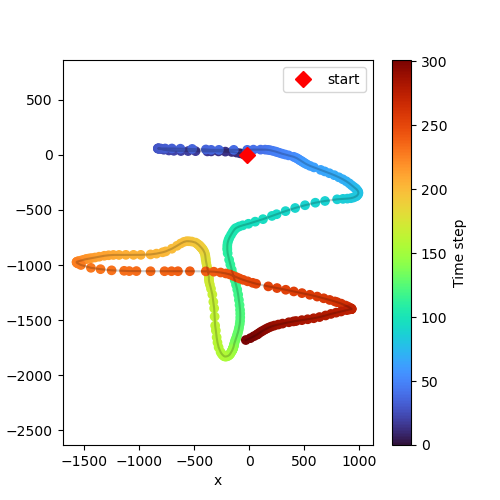

In [87]:
trialno = 56
nTime = 60
df = utils.LoadData.mouseMovement(subj, task, trialno+1)
d_trial = df[["x-shift", "y-shift"]].values
d_trial_cum = d_trial.cumsum(axis=0)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
utils.Plot.traj_withColour(d_trial_cum[:, 0], d_trial_cum[:, 1], fig, ax)

In [88]:
x = utils.DataProcessing.rollingWindow_from_df(df, nTime, 1)
y = model(torch.from_numpy(x).double())
h_ = model.model.x_hidden.detach().cpu().numpy()



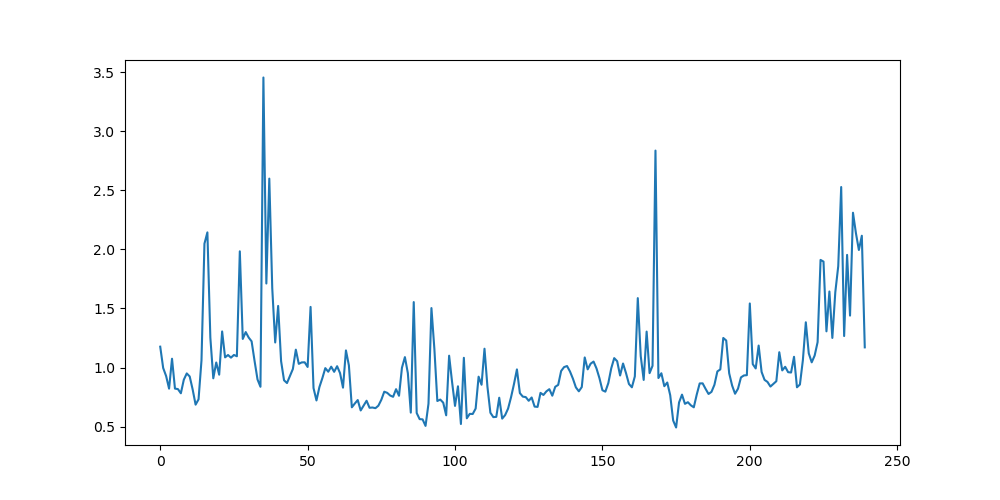

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# import scipy.ndimage
dist = utils.DataProcessing.diff(h_, measure='Mahalanobis')
ax.plot(dist)

# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# dist = utils.DataProcessing.diff(h_, measure='euclidean')
# ax.plot(dist)


# b, a = scipy.signal.butter(3, 10, 'highpass', fs=60)
# dist = scipy.signal.filtfilt(b, a, dist)
# dist = np.abs(dist)
# dist = scipy.ndimage.gaussian_filter1d(dist, 0.7, order=0)

# b, a = scipy.signal.butter(3, 7, 'highpass', fs=60)
# dist = scipy.signal.filtfilt(b, a, dist)

# taps = scipy.signal.firwin(5, 20, pass_zero='highpass', fs=60)
# Use lfilter to filter x with the FIR filter.
# dist = scipy.signal.lfilter(taps, 1.0, dist)

# ax.plot(dist)


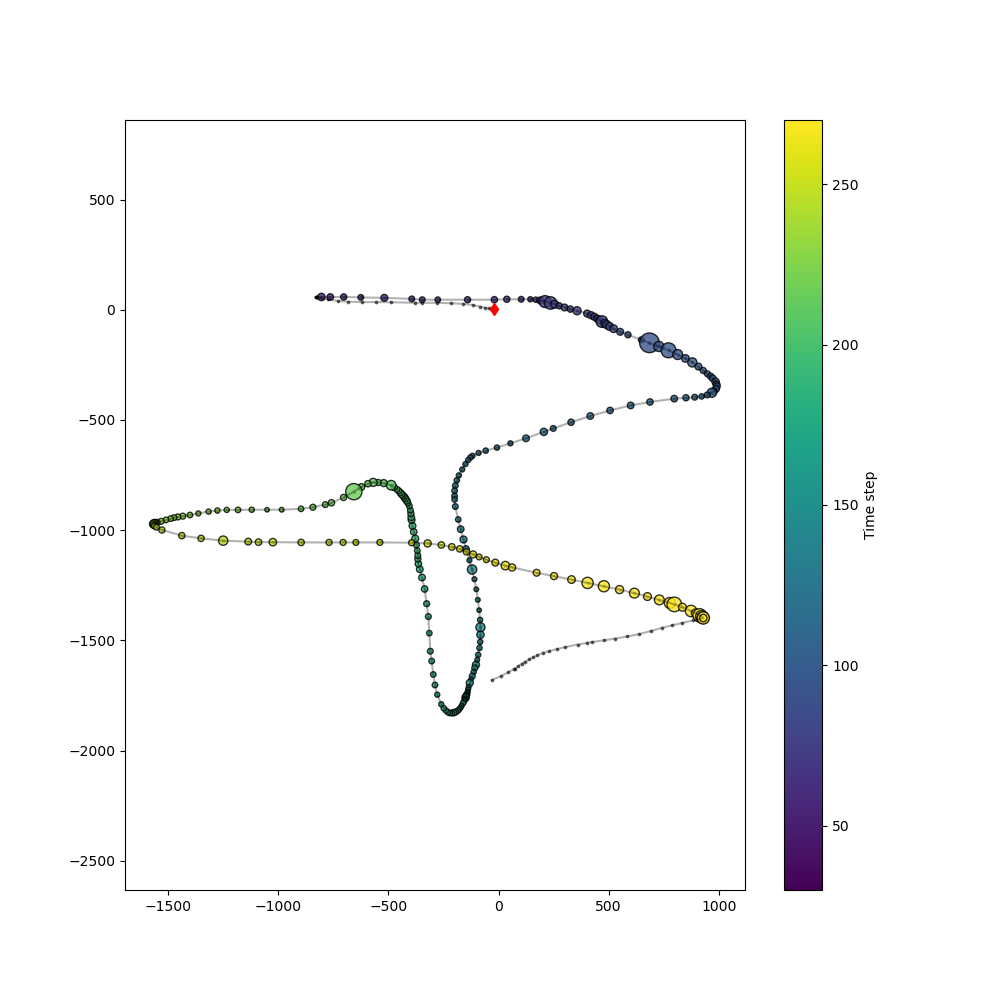

In [90]:
def traj_withWeight(x, y, w, align='e', ax=None, seqColormap='viridis', minSize=10):
    ''' Plot trajectory with weights
    align: 'e'(default) end, 's' start, 'c' center
    '''
    from sklearn.preprocessing import minmax_scale
    w = minmax_scale(w, feature_range=(minSize, 200))
    n = len(x)
    nW = len(w)
    if align == 's':
        offset = 0
    elif align == 'e':
        offset = n - nW
    elif align == 'c':
        offset = (n - nW)//2
    else:
        raise ValueError('align must be e, s, or c')

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # plot line
    ax.plot(x, y, 'k', alpha=0.3)

    # plot sample points with color
    cmap = mpl.cm.get_cmap(seqColormap)
    colors = cmap(range(n))
    # ax.scatter(x, y, c=colors, s=minSize)
    ax.scatter(x, y, c='k', s=3, alpha=0.5)

    # plot starting point
    ax.plot(x[0], y[0], 'dr')

    # plot weights
    sc = ax.scatter(x[offset:offset+nW], y[offset:offset+nW],
                    c=colors[offset:offset+nW, :],
                    s=w,
                    edgecolors='k',
                    alpha=0.8)
    ax.axis('equal')
    norm = mpl.colors.Normalize(vmin=offset, vmax=offset+nW)
    cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=seqColormap, norm=norm), ax=ax)
    cbar.set_label('Time step')
    if ax is None:
        return fig, ax




traj_withWeight(d_trial_cum[:, 0], d_trial_cum[:, 1], dist**2, align='c')


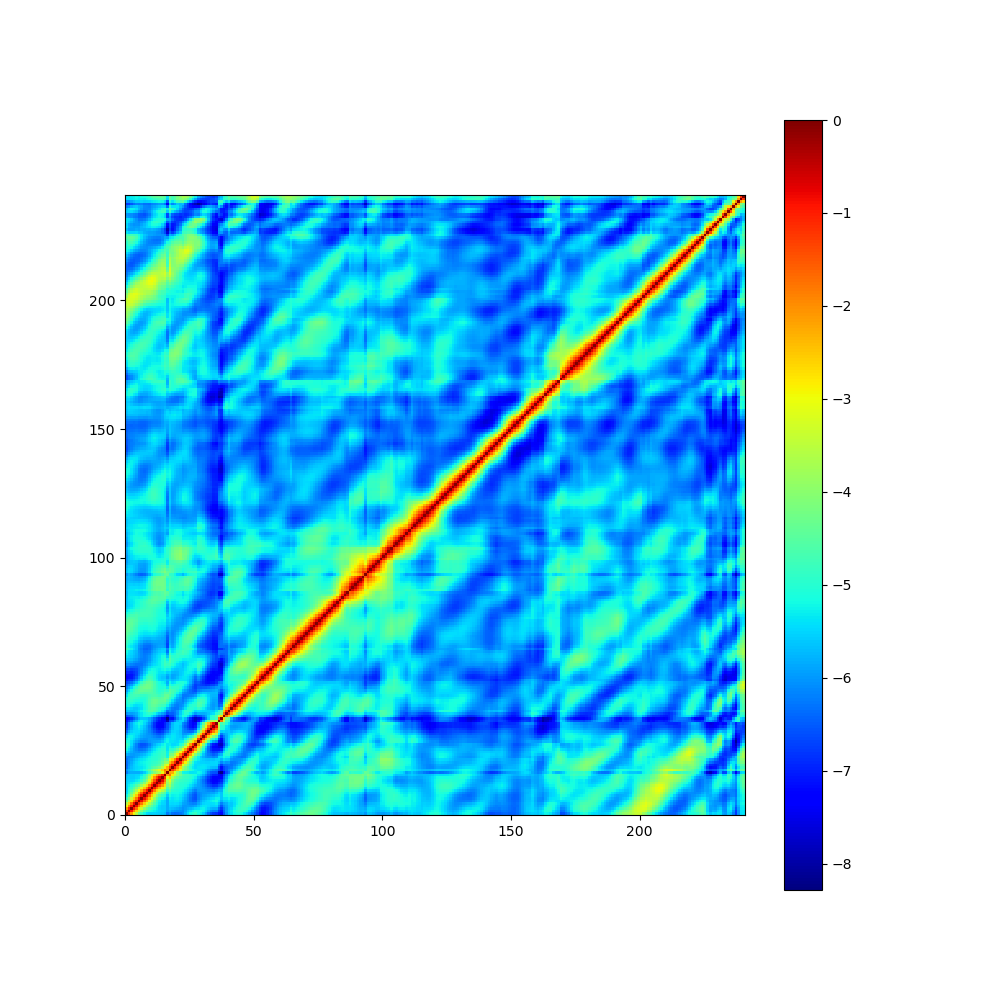

In [91]:
from scipy.spatial import distance
measure = 'mahalanobis'
# measure = 'euclidean'
# measure = 'correlation'
# measure = 'cosine'

Y = distance.pdist(h_, measure)
Y = distance.squareform(Y)
Y = -Y
fig, ax = plt.subplots(1, 1, figsize=(10,10))
im = ax.pcolormesh(Y, cmap='jet')
plt.colorbar(im)
ax.set_aspect('equal')

# neighbor and distance

In [92]:
# h__ = np.diff(h_, axis=0)
# h__ = np.abs(h__)
# h__ = np.cumsum(h__, axis=1)
# h__.shape


In [93]:
# h__ = np.diff(h_, axis=0)
# h__ = np.abs(h__)
# sns.displot(h__)


In [94]:
# dd = h__[:, -1] - h__[:,0]
# m = np.argsort(dd)
# m = m[::-1]
# m

In [95]:
# traj_withWeight(d_trial_cum[:, 0], d_trial_cum[:, 1], dd**4, align='c')


In [96]:
# fig, ax = plt.subplots(1, 1, figsize=(8,8))
# ax.plot(h__[:, :].T)